<a href="https://colab.research.google.com/github/msr0b0tjennica/fashion-recommendation-system/blob/main/fashionRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
import os

zip_file_path = '/content/drive/MyDrive/women-fashion.zip'
extraction_directory = '/content/drive/MyDrive/women-fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)
    print(f"Directory created at: {extraction_directory}")
else:
    print(f"Directory already exists at: {extraction_directory}")


Directory already exists at: /content/drive/MyDrive/women-fashion/


In [ ]:
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)
    print(f"Contents extracted to: {extraction_directory}")

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

Contents extracted to: /content/drive/MyDrive/women-fashion/
['women fashion', '__MACOSX']


In [ ]:
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['white knee-length dress with a fitted design and long sleeves.webp',
  'deep burgundy, silky dress with long sleeves and a wrap-style front.jpg',
  'long, intricately designed dress with full sleeves.jpg',
  'short, white, sleeveless dress with thin straps.jpg',
  'form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black top, white trousers.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'metallic-looking jacket with intricate designs and fringes hanging from the sleeves.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg'],
 97)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

#function to load and display an image
def display_image(file_path):
  image = Image.open(file_path)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

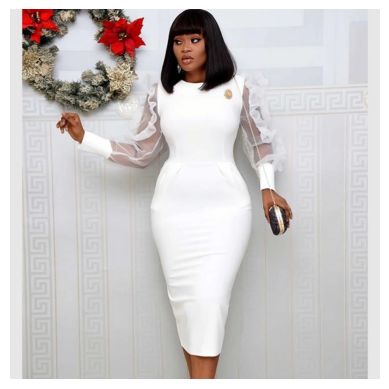

In [ ]:
#displaying the first image
image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(image_path)

In [ ]:
import glob

image_directory = '/content/drive/MyDrive/women-fashion/women fashion'
list_paths_image = [file for file in glob.glob(os.path.join(image_directory,'*.*')) if file.endswith(('.jpg','.png','.jpeg','webp'))]

print(list_paths_image)

['/content/drive/MyDrive/women-fashion/women fashion/white knee-length dress with a fitted design and long sleeves.webp', '/content/drive/MyDrive/women-fashion/women fashion/deep burgundy, silky dress with long sleeves and a wrap-style front.jpg', '/content/drive/MyDrive/women-fashion/women fashion/long, intricately designed dress with full sleeves.jpg', '/content/drive/MyDrive/women-fashion/women fashion/short, white, sleeveless dress with thin straps.jpg', '/content/drive/MyDrive/women-fashion/women fashion/form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg', '/content/drive/MyDrive/women-fashion/women fashion/beige top adorned with black dots and a green skirt.jpg', '/content/drive/MyDrive/women-fashion/women fashion/black top, white trousers.jpg', '/content/drive/MyDrive/women-fashion/women fashion/ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', '/content/drive/MyDrive/women-fashion/women fashion/metallic-looking jacket wi

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def preprocess_image(img_path):
  img = image.load_img(img_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array_expanded = np.expand_dims(img_array, axis=0)
  return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

In [ ]:
all_features = []
all_image_names = []

for img_path in list_paths_image:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.spatial.distance import cosine
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4):
    """
    Given an external image path, this function finds the top N most similar images from the dataset.
    """
    # Ensure input file exists
    if not os.path.exists(input_image_path):
        print("Error: The input image file does not exist.")
        return

    # Preprocess input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # Compute cosine similarity between input image and dataset images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]

    # Get top N similar images (excluding the input image itself if in the dataset)
    similar_indices = np.argsort(similarities)[-top_n:]

    # Display input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # Display recommended images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        similar_image_path = list_paths_image[idx]  # Get full path of similar image
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(similar_image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


Saving 0e075b88d7224f757db39ae937eb9858.jpg to 0e075b88d7224f757db39ae937eb9858.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


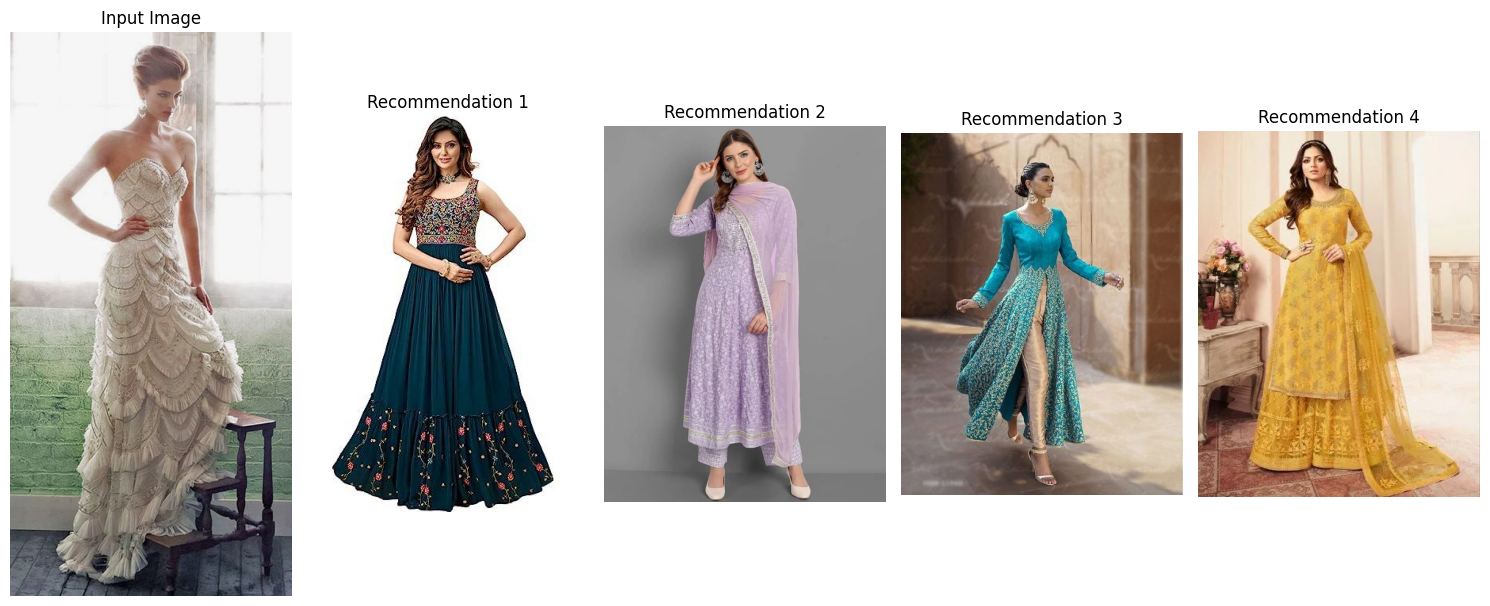

In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload image manually
external_image_path = list(uploaded.keys())[0]  # Get uploaded file name
recommend_fashion_items_cnn(external_image_path, all_features, list_paths_image, model, top_n=4)
